<a href="https://colab.research.google.com/github/himanshu3103/PyTorch/blob/main/Simple_Regression_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple Regression Model

In [1]:
#Importing all the required libraries
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

## Generating synthetic data

In [51]:
torch.manual_seed(42)
data_points = 20

#Random data on the X axis in (-5,5)
X = np.random.random(data_points)*10-5

#Using regression model to create Y = wX + b
y = 0.4*X - 1 + np.random.randn(data_points) #adds Gaussian Noise to the data
# print(f"Values of X are: {X}")
# print(f"Values of Y are: {Y}")
print(f"Max value in X {max(X)} and min value in X {min(X)}")
print(f"Max value in Y {max(y)} and min value in Y {min(y)}")

Max value in X 4.30866743902164 and min value in X -4.889145199139171
Max value in Y 1.0052585008934225 and min value in Y -4.2688879514221565


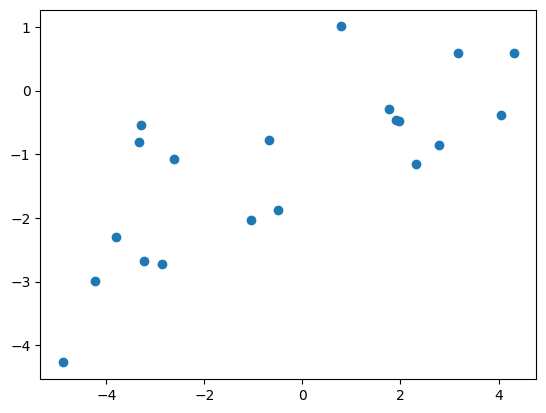

In [52]:
#Plotting the input data
plt.scatter(X,y,label="Input Data")

## Creating the Model

In [53]:
model = nn.Linear(1,1)

## Setting Loss and Optimizer

In [54]:
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(params=model.parameters(),
                            lr=1e-1)

## Converting numpy data to torch tensors for computation

In [55]:
# We need our data to be of the form (num of samples X num of dimensions)
X = X.reshape(data_points,1)
y = y.reshape(data_points, 1)

X_inputs = torch.from_numpy(X.astype(np.float32))
y_targets = torch.from_numpy(y.astype(np.float32))

## Training the Model

In [56]:
model.state_dict()

OrderedDict([('weight', tensor([[0.7645]])), ('bias', tensor([0.8300]))])

In [57]:
epochs = 50
losses = []
for epoch in range(epochs):
  model.train()
  # 1. Setting zero grad
  optimizer.zero_grad()
  # 2. Making Prediction using the values
  y_pred = model(X_inputs)
  # 3. Calculating loss 
  loss = loss_fn(y_pred,y_targets)
  losses.append(loss.item())
  # 4. Backpropagations
  loss.backward()
  # 5. Optimizer step
  optimizer.step()
  print(f"Epoch {epoch+1}/{epochs} | Loss : {loss.item():.4f}")


Epoch 1/50 | Loss : 5.3389
Epoch 2/50 | Loss : 3.6360
Epoch 3/50 | Loss : 2.5722
Epoch 4/50 | Loss : 1.9056
Epoch 5/50 | Loss : 1.4865
Epoch 6/50 | Loss : 1.2225
Epoch 7/50 | Loss : 1.0556
Epoch 8/50 | Loss : 0.9499
Epoch 9/50 | Loss : 0.8829
Epoch 10/50 | Loss : 0.8402
Epoch 11/50 | Loss : 0.8131
Epoch 12/50 | Loss : 0.7957
Epoch 13/50 | Loss : 0.7847
Epoch 14/50 | Loss : 0.7776
Epoch 15/50 | Loss : 0.7731
Epoch 16/50 | Loss : 0.7702
Epoch 17/50 | Loss : 0.7683
Epoch 18/50 | Loss : 0.7671
Epoch 19/50 | Loss : 0.7663
Epoch 20/50 | Loss : 0.7658
Epoch 21/50 | Loss : 0.7655
Epoch 22/50 | Loss : 0.7653
Epoch 23/50 | Loss : 0.7652
Epoch 24/50 | Loss : 0.7651
Epoch 25/50 | Loss : 0.7650
Epoch 26/50 | Loss : 0.7650
Epoch 27/50 | Loss : 0.7650
Epoch 28/50 | Loss : 0.7650
Epoch 29/50 | Loss : 0.7650
Epoch 30/50 | Loss : 0.7650
Epoch 31/50 | Loss : 0.7649
Epoch 32/50 | Loss : 0.7649
Epoch 33/50 | Loss : 0.7649
Epoch 34/50 | Loss : 0.7649
Epoch 35/50 | Loss : 0.7649
Epoch 36/50 | Loss : 0.7649
E

In [58]:
list(model.parameters())

[Parameter containing:
 tensor([[0.3320]], requires_grad=True),
 Parameter containing:
 tensor([-1.0521], requires_grad=True)]

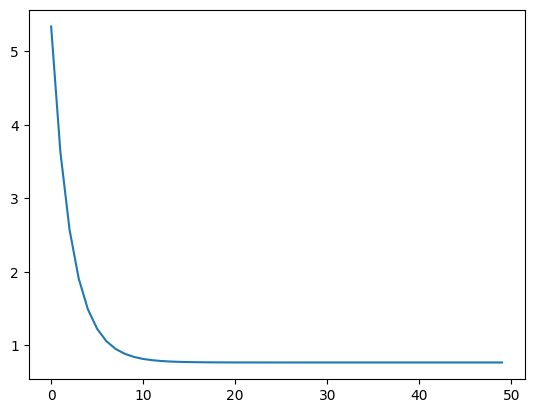

In [59]:
#Plotting our losses
plt.plot(losses)

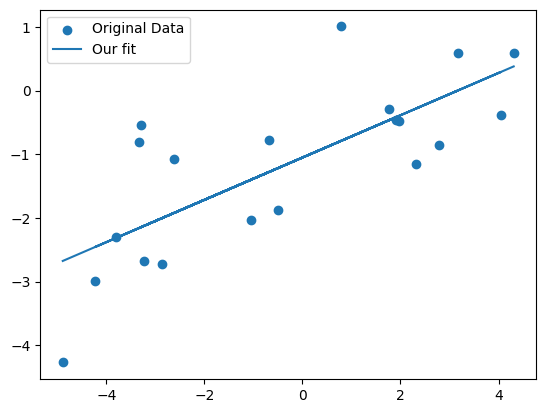

In [63]:
predicted = model(X_inputs).detach().numpy()
plt.scatter(X,y,label="Original Data")
plt.plot(X,predicted, label="Our fit")
plt.legend()
plt.show()

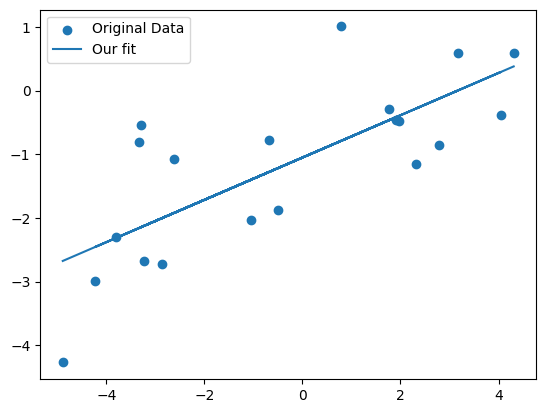

array([[ 3.7824523e-01],
       [-2.4561563e+00],
       [-1.2795773e+00],
       [-2.1606081e+00],
       [-1.2453556e-01],
       [ 1.5053749e-03],
       [-2.8542531e-01],
       [ 2.8946888e-01],
       [-2.1423140e+00],
       [-4.6658957e-01],
       [-7.9333520e-01],
       [-1.9210548e+00],
       [-1.2177213e+00],
       [-2.3124416e+00],
       [-2.0027931e+00],
       [-1.4004675e+00],
       [-3.9634591e-01],
       [-2.1244190e+00],
       [-4.1660130e-01],
       [-2.6751924e+00]], dtype=float32)

In [65]:
#Different approach for predictions
with torch.inference_mode():
  pred = model(X_inputs).numpy()
plt.scatter(X,y,label="Original Data")
plt.plot(X,pred, label="Our fit")
plt.legend()
plt.show()
pred

In [67]:
#true values w = 0.4 b = -1
w = model.weight.data.numpy()
b = model.bias.data.numpy()
print(w,b)

[[0.33197433]] [-1.0521218]
